***Uniform Cost Search (UCS)***

* Uniform Cost Search is the best algorithm for a search problem, which does not involve the use of heuristics. It can solve any general graph for optimal cost. Uniform Cost Search as it sounds searches in branches, which are more or less the same in cost.

* Uniform Cost Search again demands the use of a priority queue. Recall that Depth First Search used a priority queue with the depth up to a particular node being the priority and the path from the root to the node being the element stored. The priority queue used here is similar with the priority being the cumulative cost up to the node. Unlike Depth First Search where the maximum depth had the maximum priority, Uniform Cost Search gives the minimum cumulative cost the maximum priority.

* Uniform Cost Search is an algorithm used to move around a directed weighted search space to go from a start node to one of the ending nodes with a minimum cumulative cost. This search is an uninformed search algorithm since it operates in a brute-force manner, i.e. it does not take the state of the node or search space into consideration. It is used to find the path with the lowest cumulative cost in a weighted graph where nodes are expanded according to their cost of traversal from the root node. This is implemented using a priority queue where lower the cost higher is its priority.

* *Algorithm of Uniform Cost Search* 

Below is the algorithm to implement Uniform Cost Search in Artificial Intelligence
* Insert RootNode into the queue.
* Repeat till queue is not empty:
* Remove the next element with the highest priority from the queue.
* If the node is a destination node, then print the cost and the path and exit else insert all the children of removed elements into the queue with their cumulative cost as their priorities.

Here rootNode is the starting node for the path, and a priority queue is being maintained to maintain the path with the least cost to be chosen for the next traversal. In case 2 paths have the same cost of traversal, nodes are considered alphabetically.

**Activity 1:**
Imagine the tree but this time we also mention the cost of each edge. Start is A and Goal is G

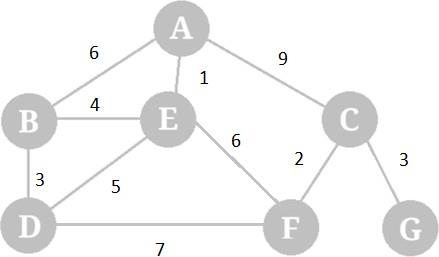

The Node class is used to represent a node in the graph.

In [1]:
class Node:
    def __init__(self, state, parent, actions, totalcost):
        self.state = state      # Stores the name of the node (e.g., 'A', 'B', etc.)
        self.parent = parent    # Stores the parent node (used for backtracking the path)
        # actions stores the list of neighboring nodes (connected nodes) and In UCS, actions will have costs 
        self.actions = actions  # Now stores tuples: [('neighbor', cost), ...]
        self.totalcost = totalcost  # Used to track path cost

In [2]:
def get_min_cost_node(frontier):
    min_cost = float('inf')  # Start with an infinitely large cost
    min_node = None          # Placeholder for the node with the minimum cost
    for node, cost in frontier:  # Iterate through all nodes in the frontier
        if cost < min_cost:   # If a node has a lower cost, update min_node
            min_cost = cost
            min_node = node
    return min_node, min_cost  # Return node with lowest cost

In [3]:
def actionsequence(graph, initialstate, goalstate):
    solution = [goalstate]  # Start with the goal node
    currentparent = graph[goalstate].parent  # Get the parent of the goal node
    
    # Following stores the parent of each node so we can later reconstruct the path from the goal node to the start node.
    while currentparent is not None:  # Keep going up until we reach the root node
        solution.append(currentparent)
        currentparent = graph[currentparent].parent  # Move to the next parent
    
    solution.reverse()  # Reverse the list to get the path from start to goal
    return solution  # Return the path as a list of node names


In [10]:
def UCS():
    initialstate = 'A'
    goalstate = 'G'
  
    # Represents edges as (neighbor, cost) pairs
    # initial total cost is set to float('inf') as initially, no paths are known
    graph = {
        'A': Node('A', None, [('B', 1), ('C', 4), ('E', 3)], float('inf')),
        'B': Node('B', None, [('A', 1), ('D', 2), ('E', 5)], float('inf')),
        'C': Node('C', None, [('A', 4), ('F', 2), ('G', 3)], float('inf')),
        'D': Node('D', None, [('B', 2), ('E', 1)], float('inf')),
        'E': Node('E', None, [('A', 3), ('B', 5), ('D', 1)], float('inf')),
        'F': Node('F', None, [('C', 2)], float('inf')),
        'G': Node('G', None, [('C', 3)], float('inf'))
    }
    # sets the initial node’s total cost to 0 because reaching itself has no cost
    graph[initialstate].totalcost = 0  # Start with cost 0
  
    frontier = [(initialstate, 0)]  # Store (state, cost)
    explored = []
    
    while frontier:
        currentnode, currentcost = get_min_cost_node(frontier)  # Get least-cost node
        frontier.remove((currentnode, currentcost))  # Remove it from frontier
        explored.append(currentnode)
        
        if currentnode == goalstate:  # goal check
            return actionsequence(graph, initialstate, goalstate)
        
        for child, cost in graph[currentnode].actions:
            new_cost = currentcost + cost  # Compute new path cost
            if child not in explored:
                if (child, new_cost) not in frontier and new_cost < graph[child].totalcost:
                    graph[child].parent = currentnode
                    graph[child].totalcost = new_cost
                    frontier.append((child, new_cost))  # Add new node with updated cost
    
    return None  # Return None if no path found

In [5]:
solution=UCS()
print(solution)

['A', 'C', 'G']


*Activity 1:*
* Imagine going from Arad to Bucharest in the map (given in manual). Implement a UCS to find the corresponding path.

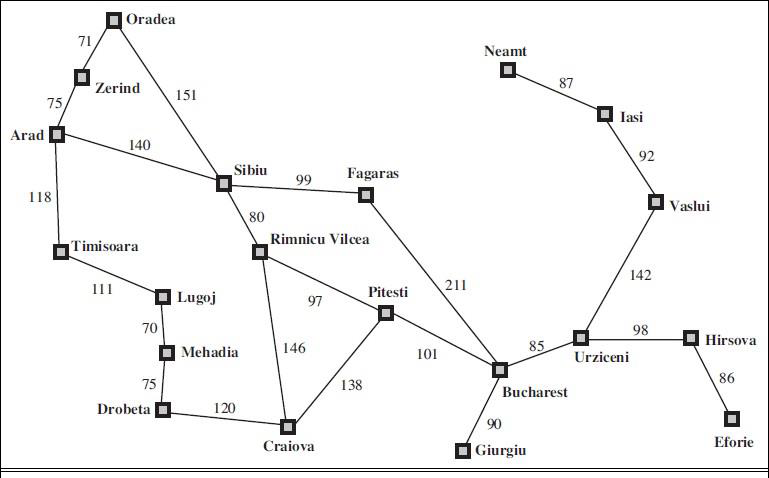

In [ ]:
def UCS():
    initialstate = 'Arad'
    goalstate = 'Oradea'
    
    # Graph representation of Romania map
    graph = {
        'Arad': Node('Arad', None, [('Zerind', 75), ('Sibiu', 140), ('Timisoara', 118)], float('inf')),
        'Zerind': Node('Zerind', None, [('Arad', 75), ('Oradea', 71)], float('inf')),
        'Oradea': Node('Oradea', None, [('Zerind', 71), ('Sibiu', 151)], float('inf')),
        'Sibiu': Node('Sibiu', None, [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu Vilcea', 80)], float('inf')),
        'Timisoara': Node('Timisoara', None, [('Arad', 118), ('Lugoj', 111)], float('inf')),
        'Lugoj': Node('Lugoj', None, [('Timisoara', 111), ('Mehadia', 70)], float('inf')),
        'Mehadia': Node('Mehadia', None, [('Lugoj', 70), ('Drobeta', 75)], float('inf')),
        'Drobeta': Node('Drobeta', None, [('Mehadia', 75), ('Craiova', 120)], float('inf')),
        'Craiova': Node('Craiova', None, [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)], float('inf')),
        'Rimnicu Vilcea': Node('Rimnicu Vilcea', None, [('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)], float('inf')),
        'Fagaras': Node('Fagaras', None, [('Sibiu', 99), ('Bucharest', 211)], float('inf')),
        'Pitesti': Node('Pitesti', None, [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)], float('inf')),
        'Bucharest': Node('Bucharest', None, [('Fagaras', 211), ('Pitesti', 101), ('Giurgiu', 90), ('Urziceni', 85)], float('inf')),
        'Giurgiu': Node('Giurgiu', None, [('Bucharest', 90)], float('inf')),
        'Urziceni': Node('Urziceni', None, [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)], float('inf')),
        'Hirsova': Node('Hirsova', None, [('Urziceni', 98), ('Eforie', 86)], float('inf')),
        'Eforie': Node('Eforie', None, [('Hirsova', 86)], float('inf')),
        'Vaslui': Node('Vaslui', None, [('Urziceni', 142), ('Iasi', 92)], float('inf')),
        'Iasi': Node('Iasi', None, [('Vaslui', 92), ('Neamt', 87)], float('inf')),
        'Neamt': Node('Neamt', None, [('Iasi', 87)], float('inf'))
    }
    
    graph[initialstate].totalcost = 0  # Start with cost 0
    frontier = [(initialstate, 0)]  # Store (state, cost)
    explored = []
    
    while frontier:
        currentnode, currentcost = get_min_cost_node(frontier)  # Get least-cost node
        frontier.remove((currentnode, currentcost))  # Remove it from frontier
        explored.append(currentnode)
        
        if currentnode == goalstate:
            return actionsequence(graph, initialstate, goalstate)
        
        for child, cost in graph[currentnode].actions:
            new_cost = currentcost + cost  # Compute new path cost
            if child not in explored:
                if (child, new_cost) not in frontier and new_cost < graph[child].totalcost:
                    graph[child].parent = currentnode
                    graph[child].totalcost = new_cost
                    frontier.append((child, new_cost))  # Add new node with updated cost
    
    return None  # Return None if no path found

solution=UCS()
print(solution)

['Arad', 'Zerind', 'Oradea']
